In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time

# Testes em sinais bidimensionais

In [2]:
# Funções que serão úteis

# Função para normalização das imagens
def normalize_imgs(img):

    # rgb para escala de cinza
    img_gray = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

    # normalizar valores e definir tipo np.uint8
    img_norm = img_gray - np.min(img_gray)
    img_norm = img_norm/np.max(img_norm)
    img_norm = 255*img_norm
    img_norm = img_norm.astype(np.uint8)

    return img_norm


# Função para gerar o filtro gaussiano que seraá usado
def gaussian_filter_2d(filter_size):

    sigma = filter_size/6.
    x_vals = np.linspace(-3*sigma, 3*sigma, filter_size)
    y_vals = x_vals.copy()
    z = np.zeros((filter_size, filter_size))
    for row in range(filter_size):
        x = x_vals[row]
    for col in range(filter_size):
        y = y_vals[col]
        z[row, col] = np.exp(-(x**2+y**2)/(2*sigma**2))
    z = z/np.sum(z)

    return z

In [11]:
# Carregamento de imagens que iremos usar nos testes 

# 15x15
img_15 = plt.imread('imgs/imagens-teste/1_15.tiff')
img_15 = normalize_imgs(img_15)

# 80x80
img_80 = plt.imread('imgs/imagens-teste/1_80.tiff')
img_80 = normalize_imgs(img_80)

# 256x256
img_256 = plt.imread('imgs/imagens-teste/1_256.tiff')

# 512x512
img_512 = plt.imread('imgs/imagens-teste/1_512.tiff')

# 1024x1024
img_1024 = plt.imread('imgs/imagens-teste/1_1024.tiff')

# 2160x2160
img_2160 = plt.imread('imgs/imagens-teste/miau_2160.jpg')
img_2160 = normalize_imgs(img_2160)

In [12]:
# Função que calula convolução da img com filtro w, retorna a img filtrada e o tempo de execução em segundos.
# Se parametro fft=False, faz convolução espacial, caso contrário, por fft.
def convolve(img, w, fft=False):

    before = time.time()
    if fft:
        img_filtered = signal.convolve(img, w, mode='same', method='fft')
    else:
        img_filtered = signal.convolve(img, w, mode='same', method='direct')

    after = time.time()
    duration = after-before

    return img_filtered, duration


# Função que faz a convolução da img com diferentes tamanhos de filtro.
# Os tamanhos de filtro que deseja usar são passados pelo array w_sizes.
def convolve_with_some_filters(img, w_sizes, plot=False):

    # "exec_times_" irá salvar os tempos de execução
    # Exemplo: [img_w1_time, img_w2_time, ...]
    exec_times_spatial = []
    exec_times_fft = []

    for size in w_sizes:

        # Criando o filtro
        w = gaussian_filter_2d(size)

        # convolução espacial
        filtered_img, time = convolve(img, w, fft=False)
        exec_times_spatial.append(time)

        # convolução por fft
        filtered_img, time = convolve(img, w, fft=True)
        exec_times_fft.append(time)


        if plot:

            # Plotando o filtro
            plt.figure(figsize=[12, 12])
            a = plt.subplot(1, 3, 1)
            a.set_title('Filtro Gaussiano:', fontsize=16)
            plt.imshow(w)

            # plotando imagem original
            a = plt.subplot(1, 3, 2)
            a.set_title('Imagem original:', fontsize=16)
            plt.imshow(img)

            # plotando imagem filtrada
            a = plt.subplot(1, 3, 3)
            a.set_title('Imagem filtrada:', fontsize=16)
            plt.imshow(filtered_img)

    return filtered_img, exec_times_spatial, exec_times_fft

In [13]:
# Os testes serão feitos com tais tamanhos de filtro:
w_sizes = [3, 5, 10, 30, 50]

# Calculando convolução para imagem 15x15
_, stime_15, ffttime_15 = convolve_with_some_filters(img_15, [3, 5, 10])

# Calculando convolução para imagem 80x80
_, stime_80, ffttime_80 = convolve_with_some_filters(img_80, w_sizes)

# Calculando convolução para imagem 256x256
_, stime_256, ffttime_256 = convolve_with_some_filters(img_256, w_sizes)

# Calculando convolução para imagem 512x512
_, stime_512, ffttime_512 = convolve_with_some_filters(img_512, w_sizes)

In [14]:
# Calculando convolução para imagem 1024x1024
_, stime_1024, ffttime_1024 = convolve_with_some_filters(img_1024, w_sizes)

# Calculando convolução para imagem 2160x2160
_, stime_2160, ffttime_2160 = convolve_with_some_filters(img_2160, w_sizes)

Text(0, 0.5, 'Tempo de execução')

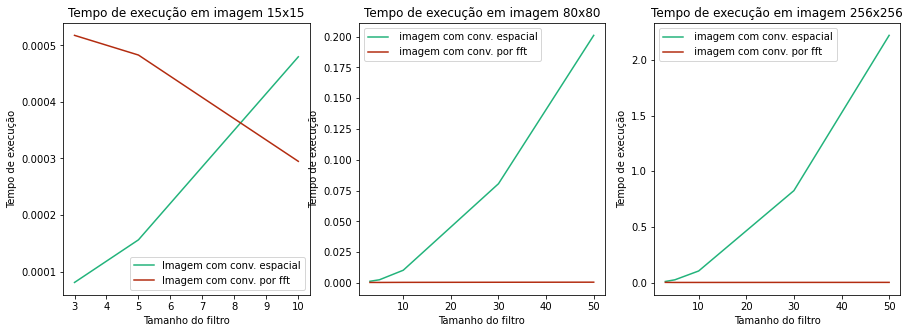

In [15]:
plt.figure(figsize=[15, 5])

plt.subplot(1, 3, 1)
plt.title('Tempo de execução em imagem 15x15')
plt.plot(np.array([3, 5, 10]), np.array(stime_15), label='Imagem com conv. espacial', c='#22B37B')
plt.plot(np.array([3, 5, 10]), np.array(ffttime_15), label='Imagem com conv. por fft', c='#B32C10')

plt.legend()
plt.xlabel('Tamanho do filtro', fontsize=10)
plt.ylabel('Tempo de execução', fontsize=10)


plt.subplot(1, 3, 2)
plt.title('Tempo de execução em imagem 80x80')
plt.plot(np.array(w_sizes), np.array(stime_80), label=' imagem com conv. espacial', c='#22B37B')
plt.plot(np.array(w_sizes), np.array(ffttime_80), label=' imagem com conv. por fft', c='#B32C10')

plt.legend()
plt.xlabel('Tamanho do filtro', fontsize=10)
plt.ylabel('Tempo de execução', fontsize=10)


plt.subplot(1, 3, 3)
plt.title('Tempo de execução em imagem 256x256')
plt.plot(np.array(w_sizes), np.array(stime_256), label=' imagem com conv. espacial', c='#22B37B')
plt.plot(np.array(w_sizes), np.array(ffttime_256), label=' imagem com conv. por fft', c='#B32C10')

plt.legend()
plt.xlabel('Tamanho do filtro', fontsize=10)
plt.ylabel('Tempo de execução', fontsize=10)

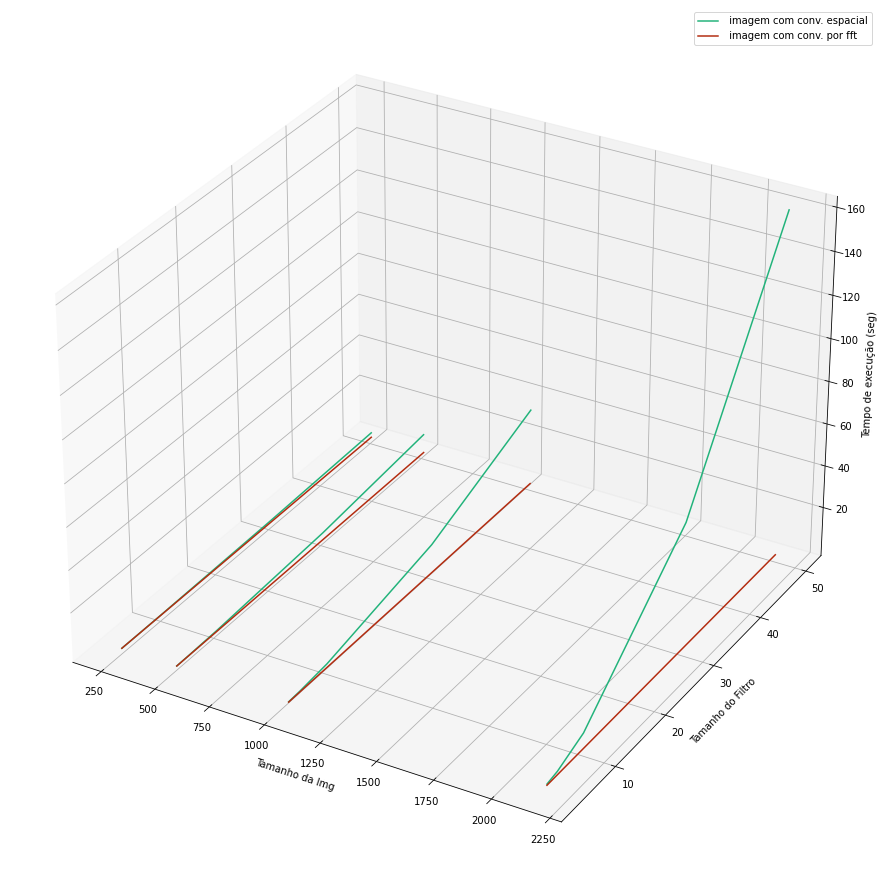

In [16]:
fig = plt.figure(figsize=[16, 16])
ax = fig.add_subplot(111, projection='3d')

ax.plot(np.linspace(256,256, 5), np.array(w_sizes), np.array(stime_256), c='#22B37B', label=' imagem com conv. espacial')
ax.plot(np.linspace(256,256, 5), np.array(w_sizes), np.array(ffttime_256), c='#B32C10', label=' imagem com conv. por fft')

ax.plot(np.linspace(512,512, 5), np.array(w_sizes), np.array(stime_512), c='#22B37B')
ax.plot(np.linspace(512,512, 5), np.array(w_sizes), np.array(ffttime_512), c='#B32C10')

ax.plot(np.linspace(1024,1024, 5), np.array(w_sizes), np.array(stime_1024), c='#22B37B')
ax.plot(np.linspace(1024,1024, 5), np.array(w_sizes), np.array(ffttime_1024), c='#B32C10')

ax.plot(np.linspace(2160,2160, 5), np.array(w_sizes), np.array(stime_2160), c='#22B37B')
ax.plot(np.linspace(2160,2160, 5), np.array(w_sizes), np.array(ffttime_2160), c='#B32C10')

ax.set_xlabel('Tamanho da Img', fontsize=10)
ax.set_ylabel('Tamanho do Filtro', fontsize=10)
ax.set_zlabel('Tempo de execução (seg)', fontsize=10)

ax.legend()
plt.show()